In [1]:
# import necessary libraries

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import layers, models # type: ignore

In [2]:
# 1. Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
print(x_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


In [3]:
# Normalize the pixel values to between 0 and 1
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape the data if needed (for CNN later)
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)


In [4]:
# 3. Build the model
model = models.Sequential([
    layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 output classes (0-9)
])

# 4. Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',  # labels are integers 0–9
              metrics=['accuracy'])

/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
# 5. Train the model
history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8994 - loss: 0.3308 - val_accuracy: 0.9848 - val_loss: 0.0505
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9865 - loss: 0.0454 - val_accuracy: 0.9887 - val_loss: 0.0393
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9906 - loss: 0.0291 - val_accuracy: 0.9885 - val_loss: 0.0403
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9928 - loss: 0.0213 - val_accuracy: 0.9908 - val_loss: 0.0328
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.9938 - loss: 0.0182 - val_accuracy: 0.9887 - val_loss: 0.0423


In [6]:
# 6. Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'\nTest accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9860 - loss: 0.0479

Test accuracy: 0.9889


In [7]:
predictions = model.predict(x_test) # make some predictions

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [8]:
# 8. Plot some results
def plot_image(i, predictions_array, true_label, img):
    true_label, img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img.squeeze(), cmap=plt.cm.binary)

    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'

    plt.xlabel(f"{predicted_label} ({100*np.max(predictions_array):.2f}%)\n[True: {true_label}]",
               color=color)

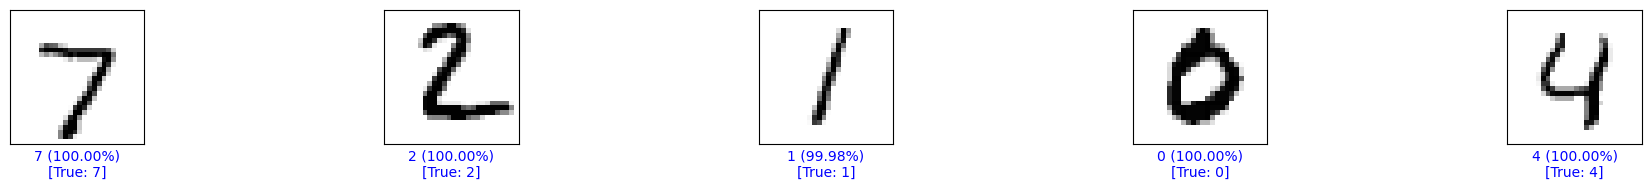

In [9]:
# Plot first 5 test images, predictions, and true labels
num_rows = 1
num_cols = 5
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows, num_cols, i+1)
    plot_image(i, predictions[i], y_test, x_test)
plt.tight_layout()
plt.show()

In [10]:
model.save('model.h5')